# 计算物理第二次作业

祝茗 2024202020022

## 数值积分

$$
\begin{aligned}
\int_{a}^{b} f(x) dx &= \lim_{max \Delta x\to 0} \sum_{i=1}^{n} f(x_i) \Delta x_i \\
&= \lim_{n\to\infty} \frac{b-a}{n} \sum_{i=1}^{n} f(x_i)
\end{aligned}
$$

### 梯形积分 (Trapezoidal rule)

$$
\int_{a}^{b} f(x) dx \approx \sum_{i}^{N} \frac{h}{2} \left[ f(x_{i+1}) + f(x_i) \right] = \frac{h}{2} \left[ f(x_1) + \sum_{i=2}^{N} f(x_i) + f(x_{N+1}) \right]
$$

取点的计算的次数：$1, 2 \cdots, 2, 1$

### 辛普森积分 (Simpson's rule)

将积分区间分成 $2$ 个区间，相当于用一段抛物线去拟合这一段函数：

$$
\int_{a}^{b} f(x) dx = \frac{b-a}{6} \left[f(a) + 4 f\left(\frac{a+b}{2}\right) + f(b)\right]
$$

取点的计算的次数：$1, 4, 1$

将积分区间分成 $2n$ 个区间：

$$
\int_{a}^{b} f(x) dx \approx \frac{h}{3} \left[ f(x_0) + 4 \sum_{i=1}^{n} f(x_{2i-1}) + 2 \sum_{i=1}^{n-1} f(x_{2i}) + f(x_n) \right]
$$

取点的计算的次数相当于把 $n$ 个 $1, 4, 1$ 拼接起来：$1, 4, 2, 4, \cdots, 2, 4, 1$

如果分成三个区间，相当于用一段抛物线去拟合这一段函数，取点的计算的次数：$1, 3, 3, 1$

分成 $3n$ 个区间：$1, 3, 3, 2, 3, 3 \cdots, 2, 3, 3, 1$

如果是高维积分，各个取点的次数就是一维积分情况下对应位置次数的乘积。

## 数值积分计算 PI

圆周率 PI 可以通过以下积分计算：

$$
I = \int_{0}^{1} \frac{4}{1+x^2} dx = \pi
$$

接下来将使用 `梯形积分` 和 `辛普森积分` 尝试来计算圆周率 PI

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### 定义积分函数和误差分析函数

In [ ]:
def integrand(x: float | np.ndarray) -> float | np.ndarray:
    """定义被积函数"""
    return 4 / (1 + x**2)


def trapezoidal_integral(a: float, b: float, f: callable, N: int) -> float:
    """梯形积分

    Args:
        a (float): 积分下限
        b (float): 积分上限
        f (callable): 被积函数
        N (int): 积分区间等分数

    Returns:
        float: 积分结果

    Example:
        >>> trapezoidal_integral(0, 1, integrand, 1000)
    """
    x = np.linspace(a, b, N + 1)
    y = f(x)

    return (2 * np.sum(y) - y[0] - y[-1]) * (b - a) / 2 / N


def simpson_integral(a: float, b: float, f: callable, N: int) -> float:
    """辛普森积分

    Args:
        a (float): 积分下限
        b (float): 积分上限
        f (callable): 被积函数
        N (int): 积分区间等分数，必须为偶数

    Returns:
        float: 积分结果

    Example:
        >>> simpson_integral(0, 1, integrand, 1000)
    """
    if N % 2 == 1:
        raise ValueError("N must be an even number")

    x = np.linspace(a, b, N + 1)
    y = f(x)

    # 取点次数为 N+1，区间数为 N，权重为 1, 4, 2, 4, ..., 2, 4, 1
    weights = np.ones(N + 1)
    weights[1:-1:2] = 4
    weights[2:-1:2] = 2

    return np.dot(y, weights) * (b - a) / 3 / N

### 可视化分析误差的大小

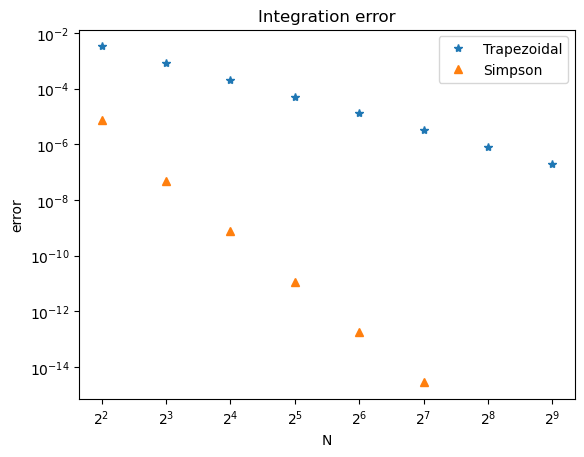

In [ ]:
true_value = np.pi
Ns = np.array([2**i for i in range(2, 10)])

I_t = np.array([trapezoidal_integral(0, 1, integrand, N) for N in Ns])
err_t = np.abs(I_t - true_value) / true_value

I_s = np.array([simpson_integral(0, 1, integrand, N) for N in Ns])
err_s = np.abs(I_s - true_value) / true_value

fig, ax = plt.subplots()

plt.title("Integration error")
plt.xlabel("N")
plt.ylabel("error")

plt.yscale("log")
plt.xscale("log", base=2)

plt.plot(Ns, err_t, "*", label="Trapezoidal")
plt.plot(Ns, err_s, "^", label="Simpson")

plt.legend(loc="best")
plt.show()

可以发现精度基本上是随取点的增加而减少，还发现 Simpson 积分的误差在图上没有完全显示。

In [30]:
print(f"err_t: {err_t}")
print(f"err_s: {err_s}")

err_t: [3.31557403e-03 8.28929586e-04 2.07232961e-04 5.18082491e-05
 1.29520624e-05 3.23801561e-06 8.09503902e-07 2.02375975e-07]
err_s: [7.64775751e-06 4.81065189e-08 7.52793472e-10 1.17636702e-11
 1.83765382e-13 2.82715972e-15 0.00000000e+00 0.00000000e+00]


说明，Simpson 积分计算的 `PI` 没什么问题，精度可以达到和 `np.pi` 相同的精度

### 自适应辛普森方法

在学习的过程中，在网络上发现了自适应辛普森方法。

大概得意思是：被积函数可能不是那么规则，在平坦的部分不需要很多取点，在剧烈变化的地方需要更多的取点。

自适应辛普森方法可以不断的二分区间，假设二分之后积分结果变化较小，可以认为积分的过程结束。

自适应辛普森方法在保证了精度的同时保证了效率。

In [ ]:
def simpson(l: float, r: float, f: callable):
    """单次辛普森积分

    Args:
        l (float): 积分下限
        r (float): 积分上限
        f (callable): 被积函数

    Returns:
        float: 积分结果
    """
    mid = (l + r) / 2
    return (r - l) * (f(l) + 4 * f(mid) + f(r)) / 6  # 辛普森公式


def asr(l: float, r: float, f: callable, eps, ans, step):
    """递归自适应辛普森积分

    Args:
        l (float): 积分下限
        r (float): 积分上限
        f (callable): 被积函数
        eps (float): 精度
        ans (float): 上一次的积分结果
        step (int): 最少递归次数
    """
    mid = (l + r) / 2  # 二分
    fl = simpson(l, mid, f)
    fr = simpson(mid, r, f)

    if abs(fl + fr - ans) <= 15 * eps and step < 0:
        return fl + fr + (fl + fr - ans) / 15  # 足够相似的话就直接返回

    # 不够相似就递归
    return asr(l, mid, f, eps / 2, fl, step - 1) + asr(mid, r, f, eps / 2, fr, step - 1)  # 否则分割成两段递归求解

/tmp/ipykernel_533/607161688.py:17: RuntimeWarning: divide by zero encountered in log10
  error_matrix[i, j] = np.log10(abs(approx_value - true_value))


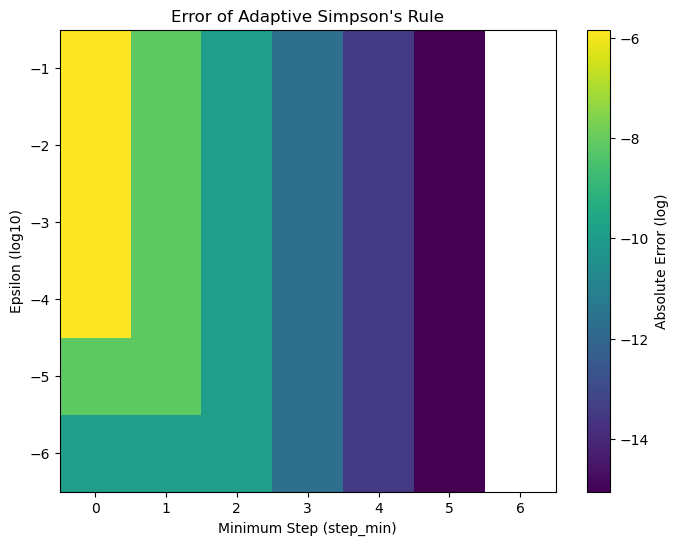

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# 真实值
true_value = np.pi

# 设置精度和最少递归次数的范围
eps_values = np.array([10 ** (-i) for i in range(1, 7)])
step_min_values = np.arange(7)


error_matrix = np.zeros((len(eps_values), len(step_min_values)))
for i, eps in enumerate(eps_values):
    for j, step_min in enumerate(step_min_values):
        approx_value = asr(0, 1, integrand, eps, simpson(0, 1, integrand), step_min)
        error_matrix[i, j] = np.log10(abs(approx_value - true_value))

# Plotting the color map
X, Y = np.meshgrid(step_min_values, np.log10(eps_values))
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, error_matrix, shading="auto", cmap="viridis")
plt.colorbar(label="Absolute Error (log)")
plt.xlabel("Minimum Step (step_min)")
plt.ylabel("Epsilon (log10)")
plt.title("Error of Adaptive Simpson's Rule")
plt.show()

可以看出，只需要至少迭代 6 次，就能确保达到 `np.pi` 的精度。

## 蒙特卡洛方法计算 PI

通过模拟计算圆的面积，计算圆周率 PI

$$
H =
\begin{cases}
1 & \text{, if } x^2+y^2 \le 1 \\
0 & \text{, else}
\end{cases}
$$

$$
\int_{-1}^{1} \int_{-1}^{1} H(x, y) \mathrm{d}x \mathrm{d}y = \pi
$$

所以

$$
\pi \approx I_N = \frac{4}{N} \sum_{i=1}^{N} H(x_i, y_i)
$$

### 定义蒙特卡洛过程

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


def MC_pi(N: int) -> float:
    """Estimate pi using Monte Carlo simulation.

    Args:
        N (int): Number of random points to generate.

    Returns:
        float: Estimate of pi.
    """
    point_xs = np.random.uniform(-1, 1, N)
    point_ys = np.random.uniform(-1, 1, N)
    R2s = point_xs**2 + point_ys**2
    I_N = 4 * np.sum(R2s < 1) / N
    return I_N


err = []
Ns = [2**i for i in range(2, 25)]

for N in tqdm(Ns):
    pi = MC_pi(N)
    err.append(abs(pi - np.pi) / np.pi)

100%|██████████| 23/23 [00:01<00:00, 18.39it/s] 


### 可视化误差

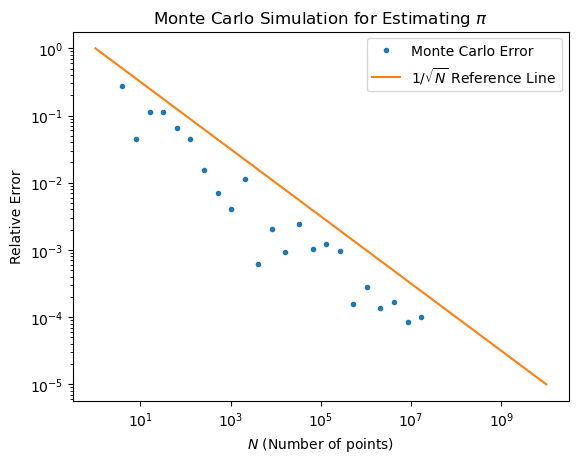

In [ ]:
fig, ax = plt.subplots()
plt.title("Monte Carlo Simulation for Estimating $\pi$")
plt.xlabel("$N$ (Number of points)")
plt.ylabel("Relative Error")

plt.yscale("log")
plt.xscale("log")

plt.plot(Ns, err, ".", label="Monte Carlo Error")
plt.plot([1, 1e10], [1, 1e-5], label="$1/\sqrt{N}$ Reference Line")

plt.legend()
plt.show()